In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import datetime

# Set pandas display option to prevent scientific notation
pd.options.display.float_format = '{:.3f}'.format

# Load the dataset
df = pd.read_csv('d:/Python/FinancialRisk/Data/raw/Loan.csv')

# Convert ApplicationDate to datetime
df['ApplicationDate'] = pd.to_datetime(df['ApplicationDate'])

print("\n--- First 5 Rows ---")
print(df.head())


--- First 5 Rows ---
  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0       3329.000          

In [2]:
# --- Column Type Grouping ---
print("\n--- Column Type Groupings ---")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")
datetime_cols = df.select_dtypes(include=['datetime64']).columns.tolist()
print(f"Datetime columns ({len(datetime_cols)}): {datetime_cols}")


--- Column Type Groupings ---
Numerical columns (30): ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments', 'CreditCardUtilizationRate', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory', 'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory', 'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory', 'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'LoanApproved', 'RiskScore']
Categorical columns (5): ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']
Datetime columns (1): ['ApplicationDate']


In [3]:
# --- Missing Data Check ---
print("\n--- Missing Values Summary ---")

# Calculate missing values and their percentage
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

# Create a DataFrame for a clear summary
missing_df = pd.DataFrame({
    'Null Count': missing_values,
    'Percentage': missing_percent
})

# Filter to show only columns with missing values and sort for better readability
missing_summary = missing_df[missing_df['Null Count'] > 0].sort_values(by='Null Count', ascending=False)

# Display the summary
if missing_summary.empty:
    print("No missing values found in the dataset.")
else:
    print(missing_summary)

# --- Descriptive Statistics ---
print("\n--- Descriptive Statistics for Numerical Columns ---")
print(df[numerical_cols].describe())

print("\n--- Value Counts for Categorical Columns ---")
for col in categorical_cols:
    print(f"\n--- {col} (Unique Values: {df[col].nunique()}) ---")
    print(df[col].value_counts())


--- Missing Values Summary ---
No missing values found in the dataset.

--- Descriptive Statistics for Numerical Columns ---
            Age  AnnualIncome  CreditScore  Experience  LoanAmount  \
count 20000.000     20000.000    20000.000   20000.000   20000.000   
mean     39.753     59161.474      571.612      17.523   24882.868   
std      11.623     40350.845       50.997      11.317   13427.421   
min      18.000     15000.000      343.000       0.000    3674.000   
25%      32.000     31679.000      540.000       9.000   15575.000   
50%      40.000     48566.000      578.000      17.000   21914.500   
75%      48.000     74391.000      609.000      25.000   30835.000   
max      80.000    485341.000      712.000      61.000  184732.000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count     20000.000           20000.000            20000.000   
mean         54.057               1.517              454.293   
std          24.665               1.386            

In [4]:
# --- Target Variable Analysis ---
print("\n--- LoanApproved Distribution ---")
print(df['LoanApproved'].value_counts())
print("\n--- LoanApproved Distribution (%) ---")
print(df['LoanApproved'].value_counts(normalize=True) * 100)

# --- Data Quality Checks ---
print("\n--- Data Quality Checks ---")
print(f"Number of duplicate rows: {df.duplicated().sum()}")

print("\n--- Datatype Breakdown ---")
print(df.dtypes.value_counts())

print("\n--- Range Checks for Key Variables ---")
key_vars = ['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount']
for var in key_vars:
    print(f"{var}: Min={df[var].min()}, Max={df[var].max()}")

# --- Grouped Statistics ---
print("\n--- Grouped Statistics (Approved vs. Rejected) ---")
# Exclude boolean 'LoanApproved' from numerical columns for this aggregation
numerical_cols_for_grouping = [col for col in numerical_cols if col != 'LoanApproved']
print(df.groupby('LoanApproved')[numerical_cols_for_grouping].agg(['mean', 'median', 'std']))

# --- Crosstabulation Analysis ---
print("\n--- Approval Rate by Employment Status (% of Total for each status) ---")
print(pd.crosstab(df['EmploymentStatus'], df['LoanApproved'], normalize='index') * 100)

print("\n\nInitial analysis complete.")


--- LoanApproved Distribution ---
LoanApproved
0    15220
1     4780
Name: count, dtype: int64

--- LoanApproved Distribution (%) ---
LoanApproved
0   76.100
1   23.900
Name: proportion, dtype: float64

--- Data Quality Checks ---
Number of duplicate rows: 0

--- Datatype Breakdown ---
int64             21
float64            9
object             5
datetime64[ns]     1
Name: count, dtype: int64

--- Range Checks for Key Variables ---
Age: Min=18, Max=80
AnnualIncome: Min=15000, Max=485341
CreditScore: Min=343, Max=712
LoanAmount: Min=3674, Max=184732

--- Grouped Statistics (Approved vs. Rejected) ---
                Age               AnnualIncome                      \
               mean median    std         mean    median       std   
LoanApproved                                                         
0            38.834 39.000 11.680    45641.461 40557.500 24079.007   
1            42.677 42.000 10.936   102210.551 91269.500 50313.413   

             CreditScore                

In [8]:
print(df.describe())
print(df.dtypes)

           ApplicationDate       Age  AnnualIncome  CreditScore  Experience  \
count                20000 20000.000     20000.000    20000.000   20000.000   
mean   2045-05-18 12:00:00    39.753     59161.474      571.612      17.523   
min    2018-01-01 00:00:00    18.000     15000.000      343.000       0.000   
25%    2031-09-09 18:00:00    32.000     31679.000      540.000       9.000   
50%    2045-05-18 12:00:00    40.000     48566.000      578.000      17.000   
75%    2059-01-25 06:00:00    48.000     74391.000      609.000      25.000   
max    2072-10-03 00:00:00    80.000    485341.000      712.000      61.000   
std                    NaN    11.623     40350.845       50.997      11.317   

       LoanAmount  LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count   20000.000     20000.000           20000.000            20000.000   
mean    24882.868        54.057               1.517              454.293   
min      3674.000        12.000               0.000         

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


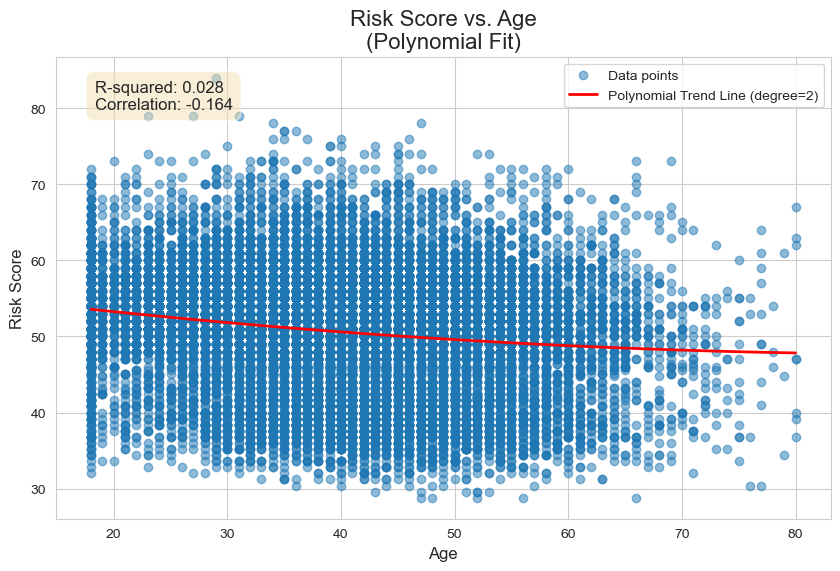

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


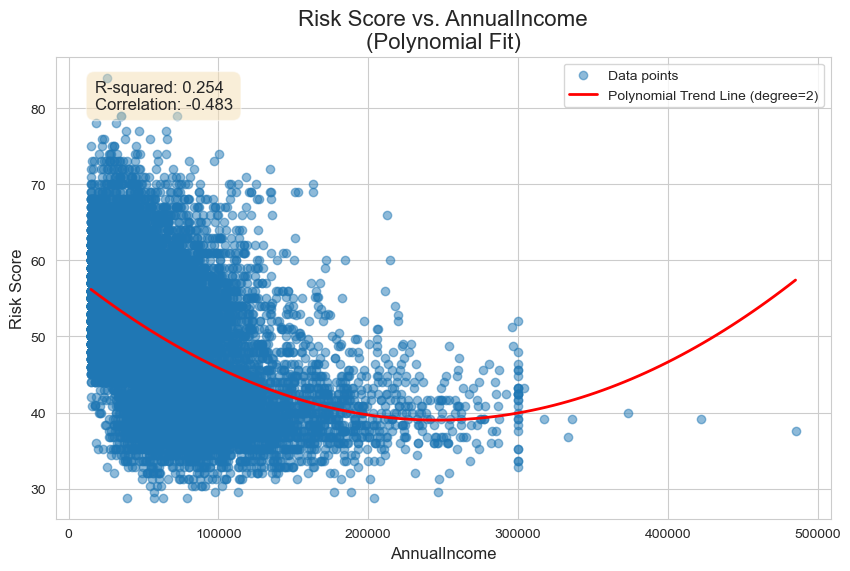

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


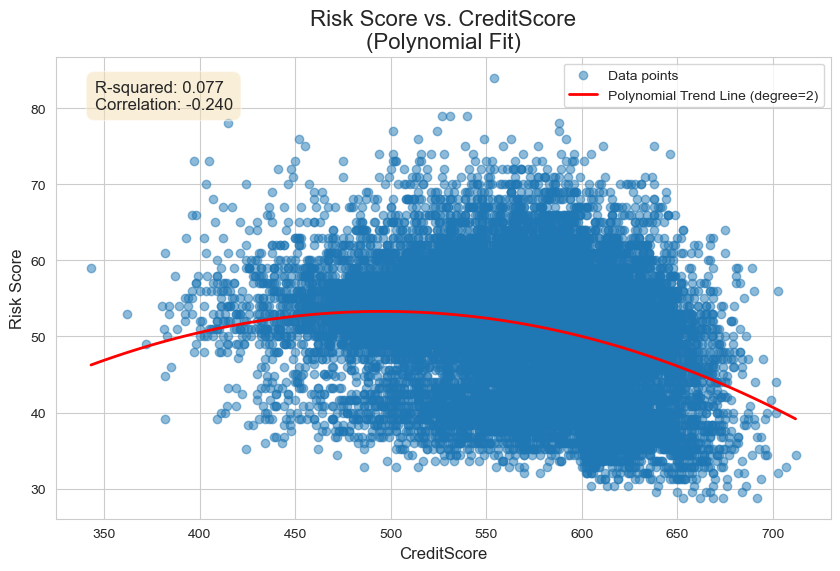

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


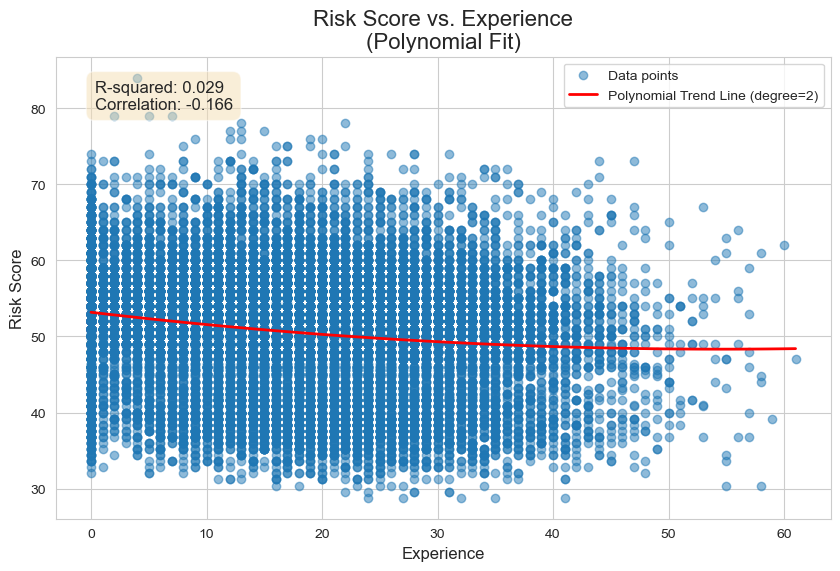

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


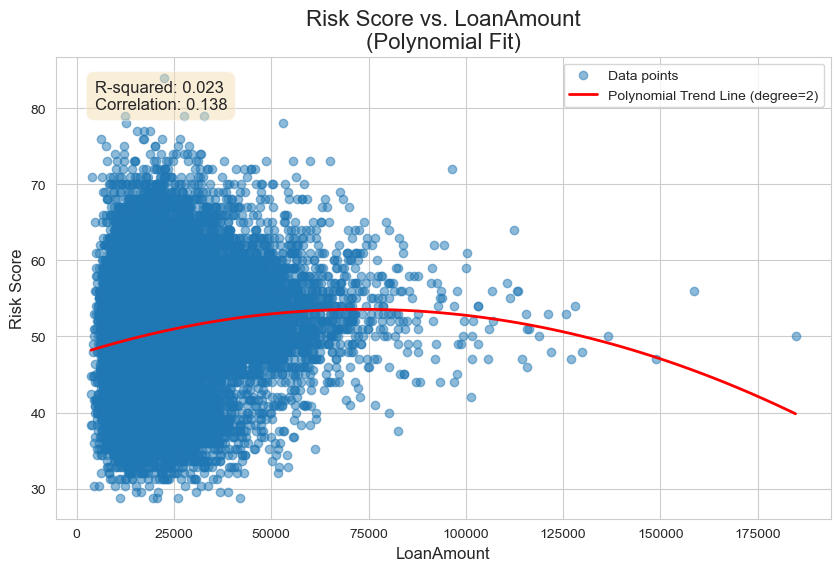

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


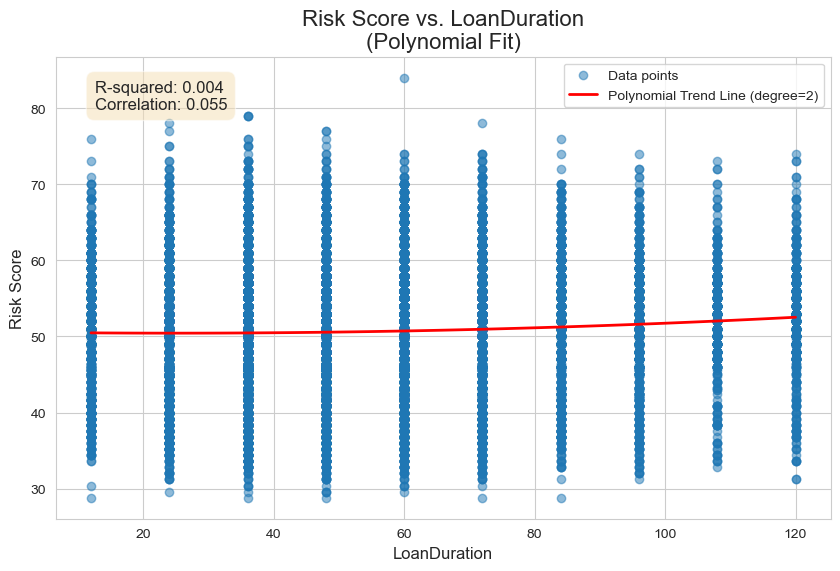

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


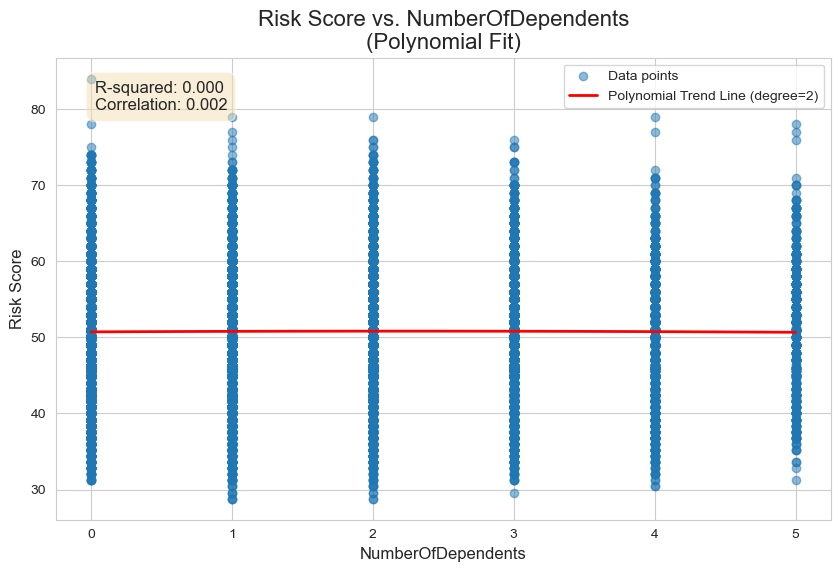

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


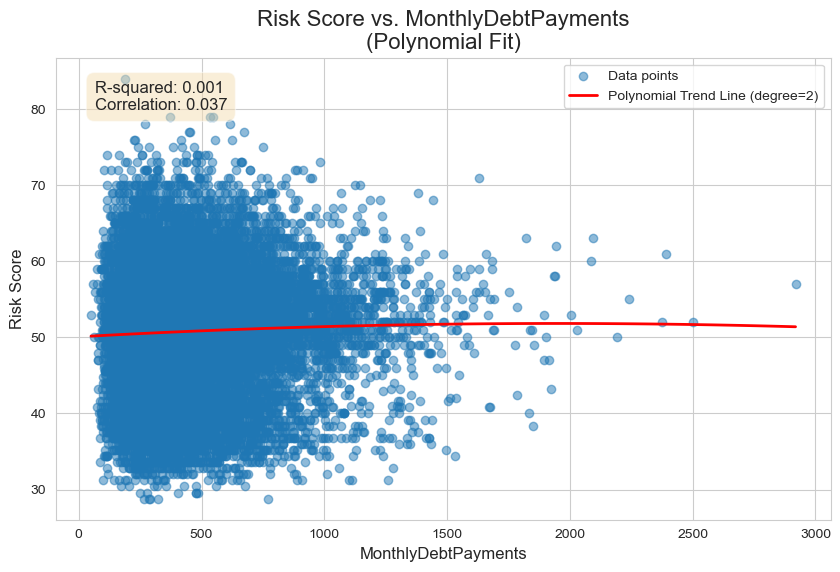

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


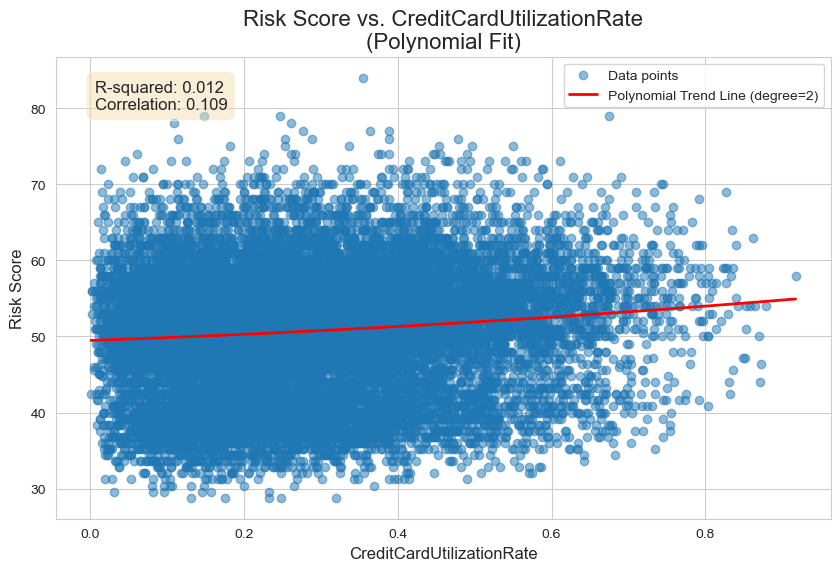

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


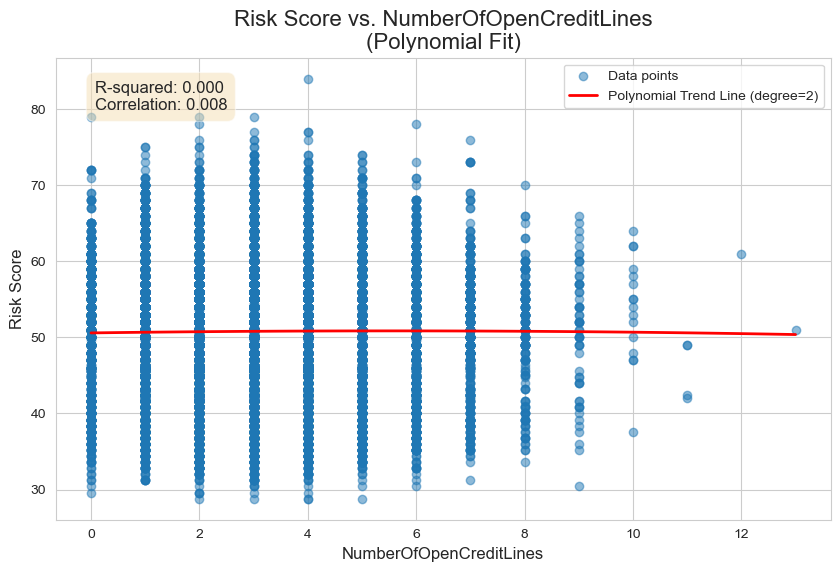

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


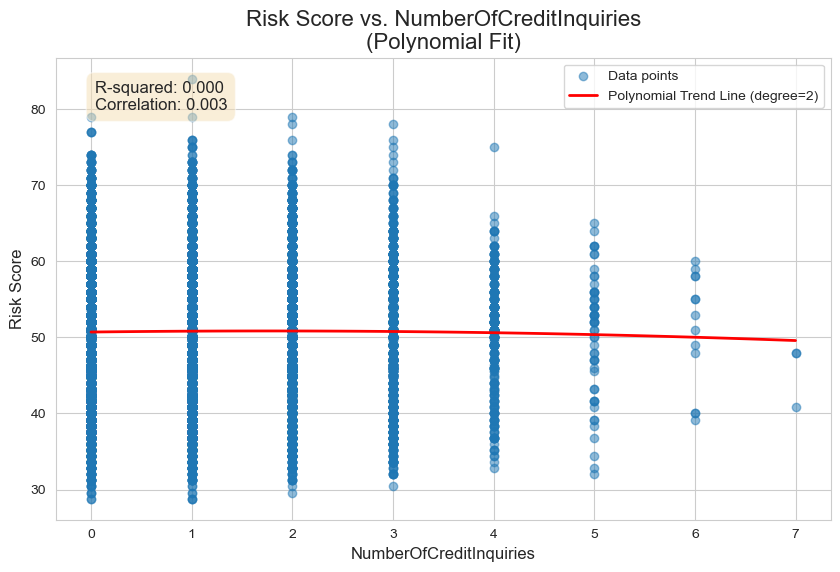

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


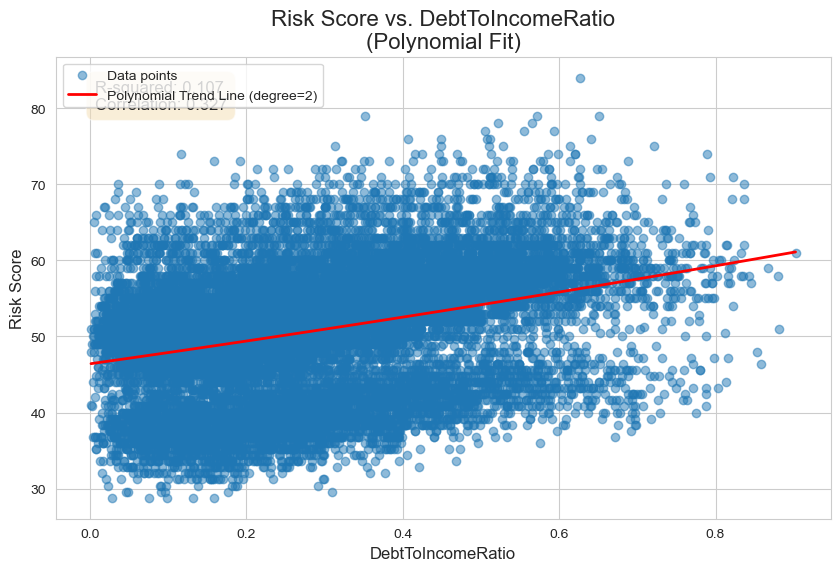

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


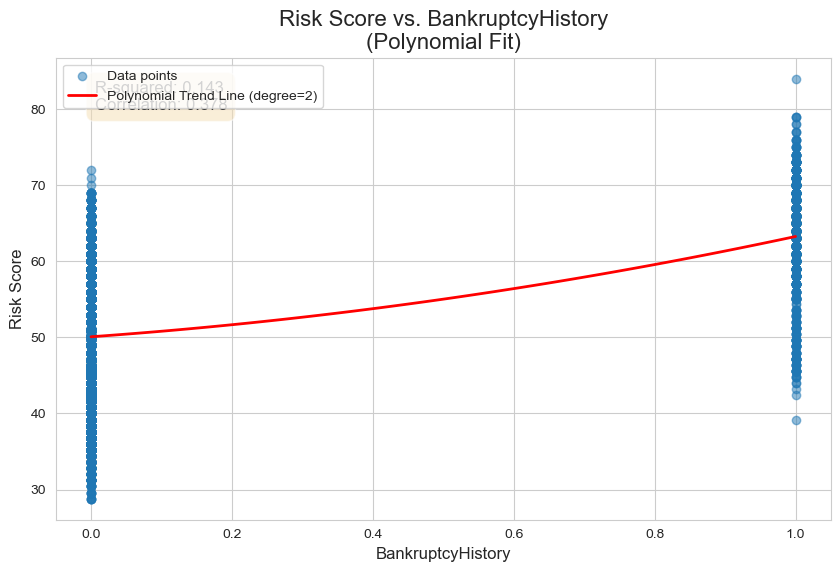

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


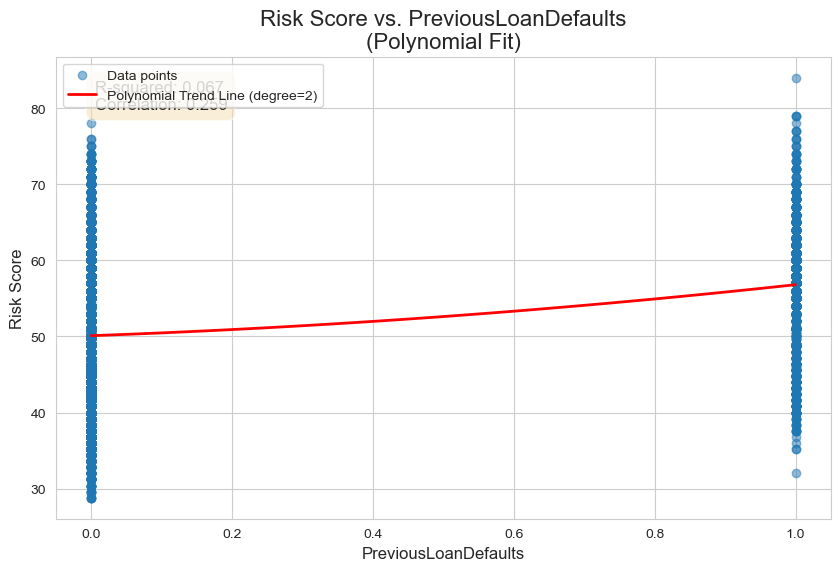

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


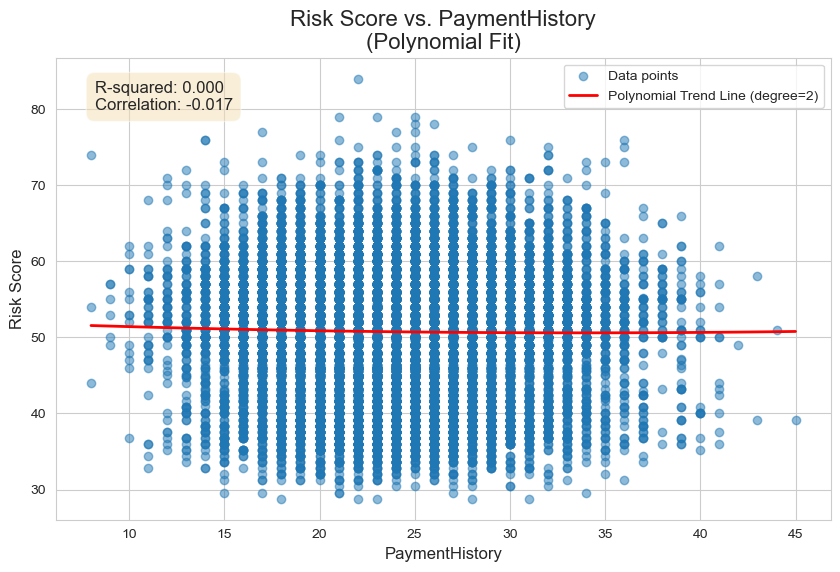

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


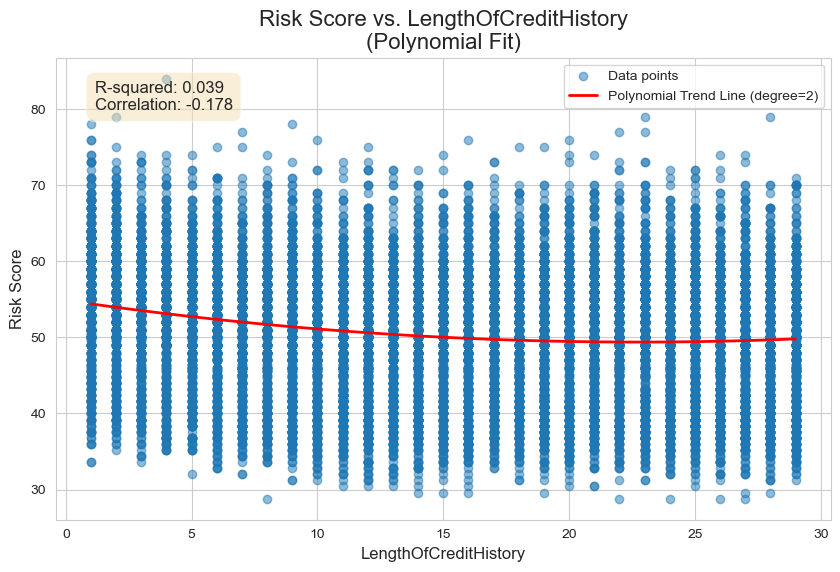

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


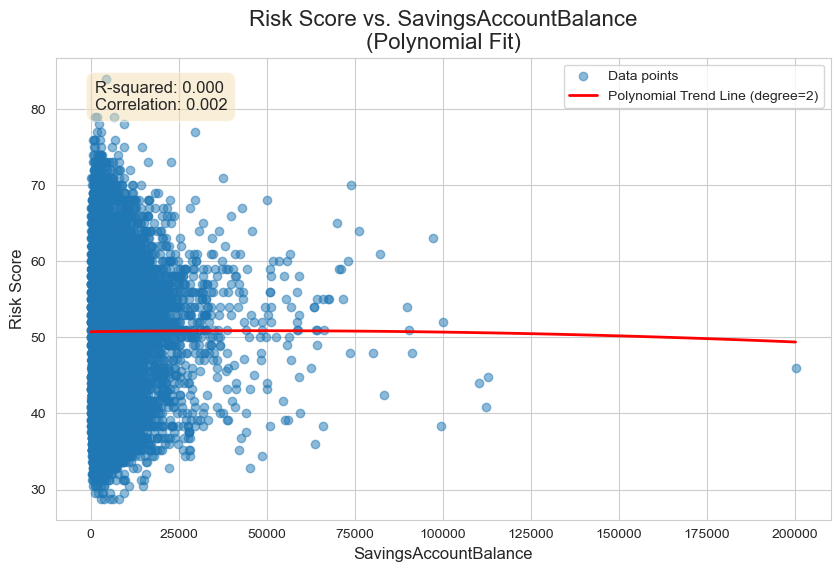

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


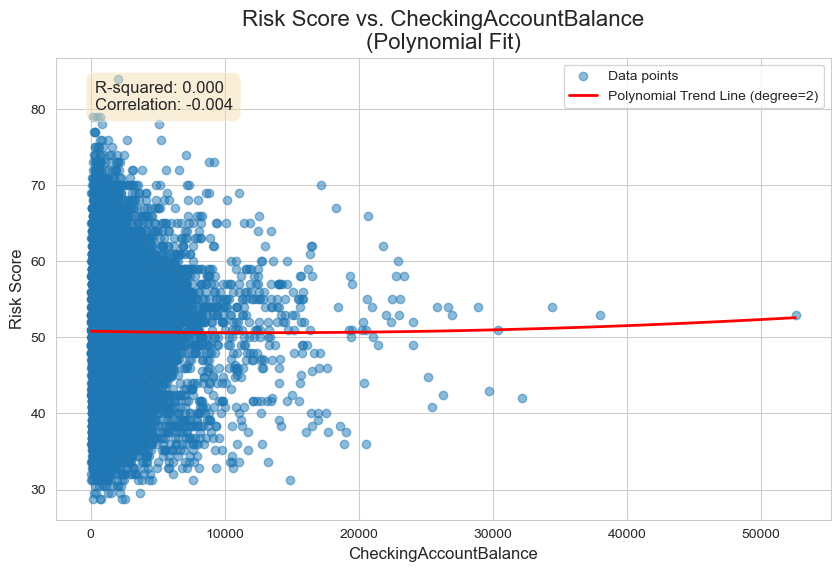

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


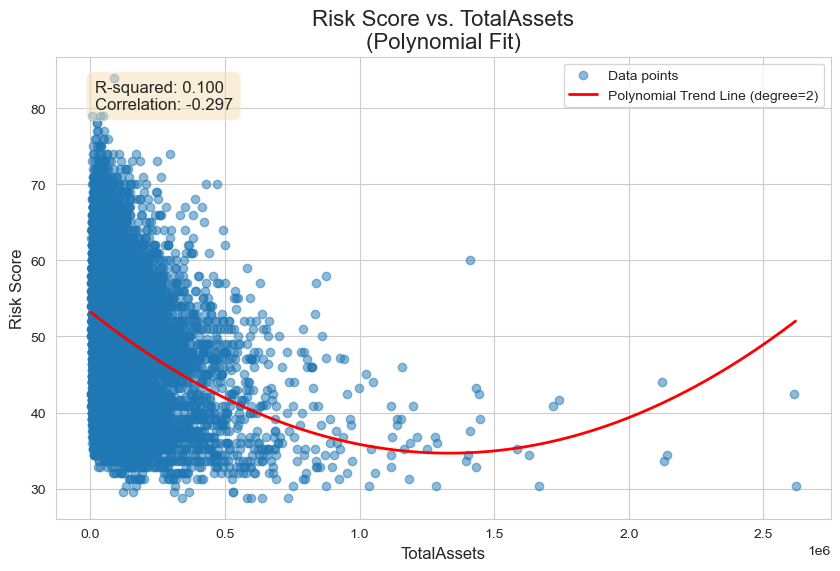

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


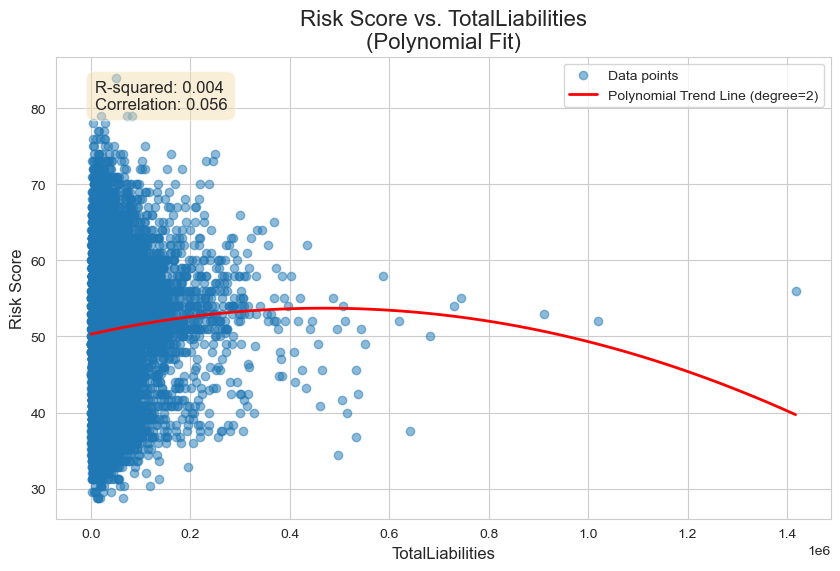

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


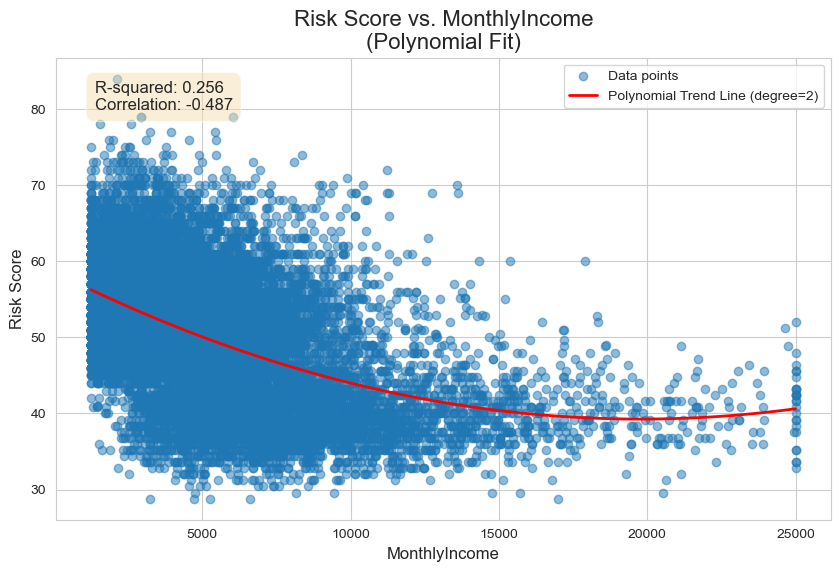

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


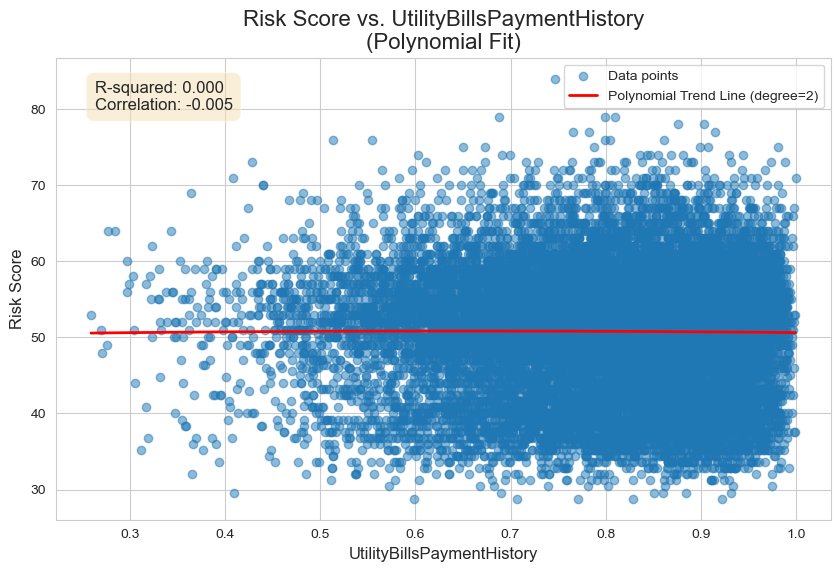

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


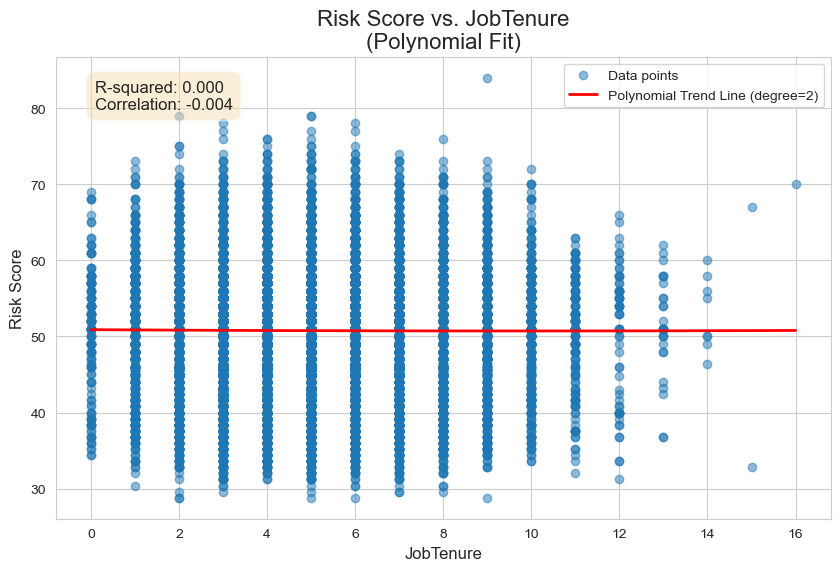

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


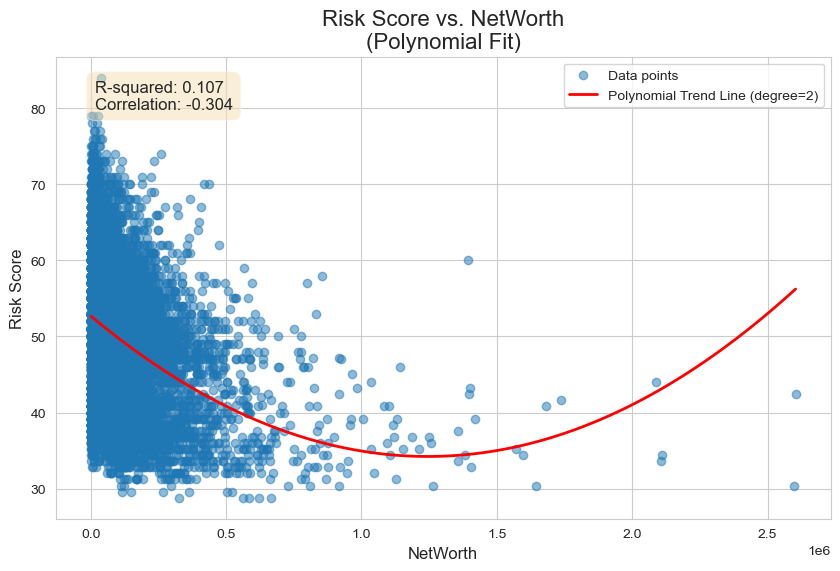

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


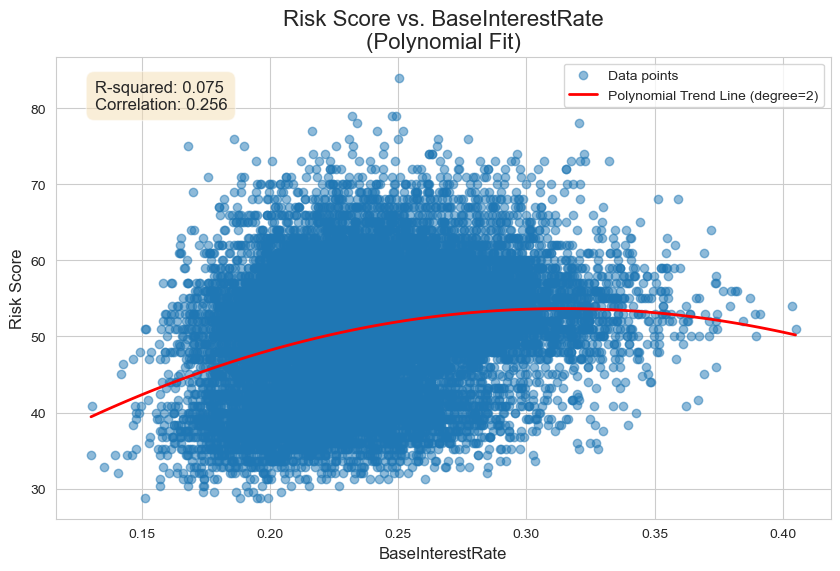

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


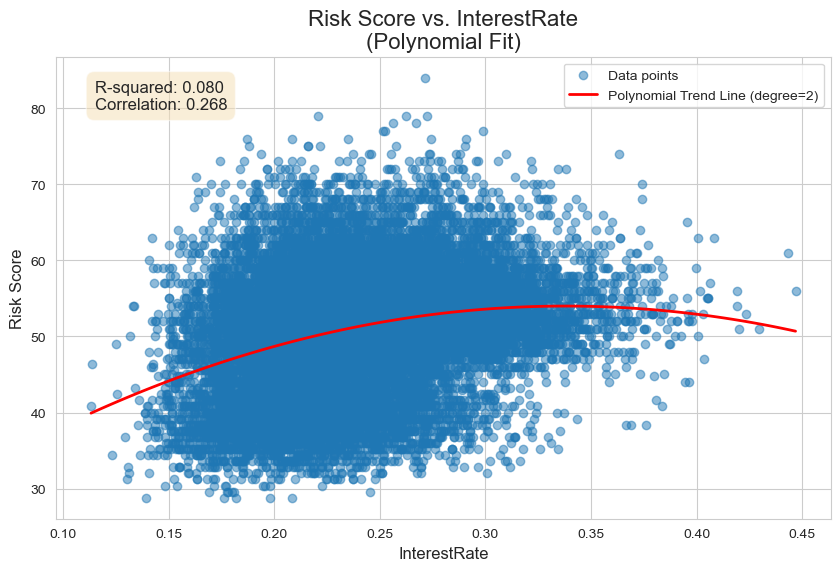

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


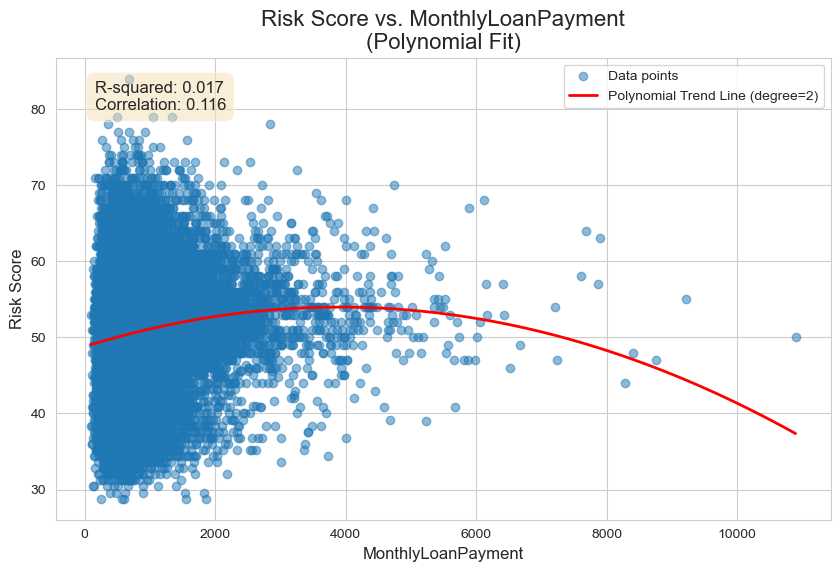

c:\Users\jorda\anaconda3\envs\financialRisk\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


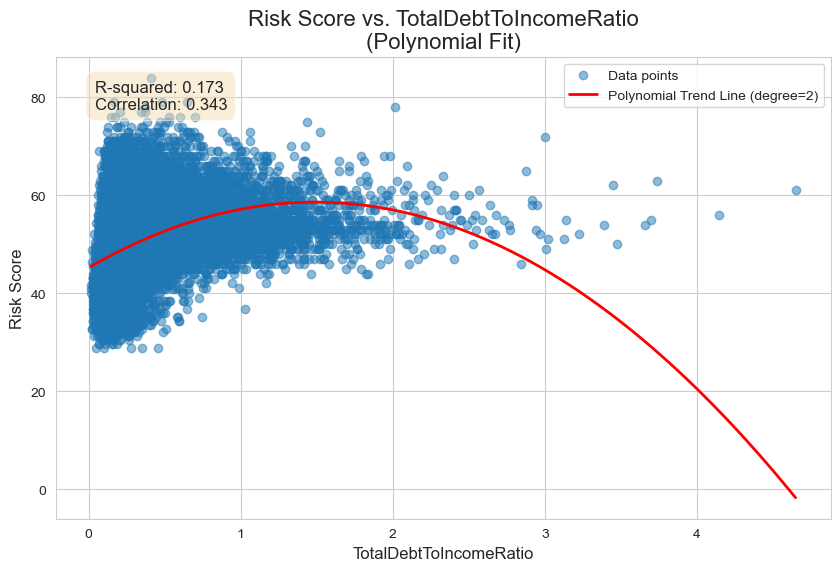

In [ ]:

sns.set_style("whitegrid")

# --- Assuming 'df' DataFrame is already loaded ---

try:
    # Get all numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

    # Define the target variable
    target_variable = 'RiskScore'

    # Remove the target variable and any ID columns from the list of features
    if target_variable in numeric_columns:
        numeric_columns.remove(target_variable)
    for col_to_remove in ['LoanID', 'CustomerID', 'LoanApproved']: # Also remove LoanApproved if it exists
        if col_to_remove in numeric_columns:
            numeric_columns.remove(col_to_remove)

    # Loop through each numeric column to create a scatter plot
    for column in numeric_columns:
        # Skip columns with no variance or too many NaNs
        if df[column].nunique() < 2 or df[column].isnull().sum() / len(df) > 0.5:
            print(f"Skipping '{column}' due to low variance or high number of NaNs.")
            continue

        try:
            plt.figure(figsize=(10, 6))

            # Drop NaNs for fitting the model for the current column and target
            temp_df = df[[column, target_variable]].dropna()
            if temp_df.empty:
                print(f"Skipping '{column}' due to all NaN values after cleaning.")
                continue
                
            x_values = temp_df[[column]]
            y_values = temp_df[target_variable]

            # Plot scatter points
            plt.scatter(x_values, y_values, alpha=0.5, label='Data points')

            # Create and fit the polynomial regression model
            poly_features = PolynomialFeatures(degree=2)
            x_poly = poly_features.fit_transform(x_values)

            model = LinearRegression()
            model.fit(x_poly, y_values)

            # Create a smooth range for the trend line
            x_range = np.linspace(x_values.min(), x_values.max(), 100).reshape(-1, 1)
            x_range_poly = poly_features.transform(x_range)
            y_pred = model.predict(x_range_poly)
            
            # Sort values for plotting the line correctly
            sort_axis = x_range.flatten().argsort()
            x_range_sorted = x_range.flatten()[sort_axis]
            y_pred_sorted = y_pred[sort_axis]

            # Plot the polynomial trend line
            plt.plot(x_range_sorted, y_pred_sorted, color='red', linewidth=2, label='Polynomial Trend Line (degree=2)')

            # Calculate R-squared value
            y_fit_pred = model.predict(x_poly)
            r2 = r2_score(y_values, y_fit_pred)
            
            # Calculate Pearson correlation coefficient
            correlation_matrix = np.corrcoef(x_values.values.flatten(), y_values)
            correlation_coefficient = correlation_matrix[0, 1]

            # Add titles and labels
            plt.title(f'Risk Score vs. {column}\n(Polynomial Fit)', fontsize=16)
            plt.xlabel(column, fontsize=12)
            plt.ylabel('Risk Score', fontsize=12)
            plt.legend()
            
            # Add text box for metrics
            plt.text(0.05, 0.95, f'R-squared: {r2:.3f}\nCorrelation: {correlation_coefficient:.3f}',
                     transform=plt.gca().transAxes, fontsize=12,
                     verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', fc='wheat', alpha=0.5))

            # Show the plot
            plt.show()

        except Exception as e:
            print(f"Could not create plot for '{column}'. Reason: {e}")

except NameError:
    print("Error: DataFrame 'df' not found. Please ensure it is loaded before running this cell.")
except KeyError:
    print(f"Error: Target variable '{target_variable}' not found in the DataFrame.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")